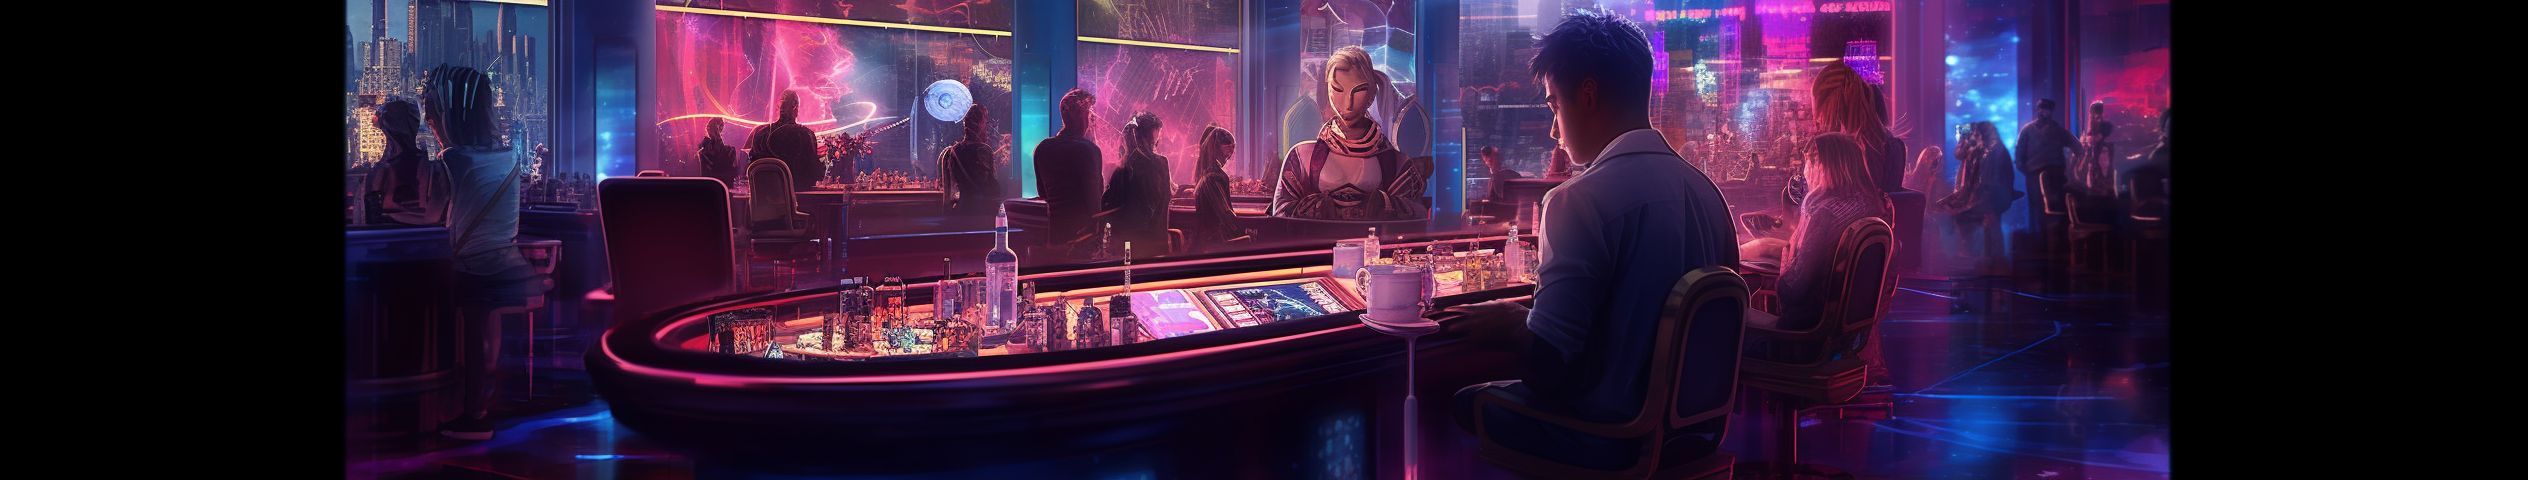

# ETF portfolio

In [3]:
'''
本exercise無限制使用的套件
No limit of packages uesd in this exercise
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Any other package, please import at here:

# Load ETFs' data

df = pd.read_csv("data\Q3_data.csv")

# This Data is very clean, no need for data pre-processing.
# But might need to use groupby or select

df['Date'] = pd.to_datetime(df['Date'])

# Pivot data to wide format
df = df.pivot(index='Date', columns='Symbol', values='Close')

df

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
1998-12-22,120.687500,20.828125,NaN,23.265625,18.937855,23.281250,32.046875,26.500000,NaN,29.828125,25.031250,25.468750
1998-12-23,123.218750,21.046875,NaN,23.750000,19.217100,23.687500,32.812500,27.140625,NaN,29.703125,25.593750,25.578125
1998-12-24,122.687500,21.531250,NaN,23.625000,19.344028,24.000000,32.687500,27.093750,NaN,30.250000,25.750000,26.046875
1998-12-28,122.375000,21.343750,NaN,23.500000,19.090172,24.125000,32.781250,26.937500,NaN,30.093750,25.375000,25.812500
1998-12-29,124.312500,21.734375,NaN,23.734375,19.293259,24.468750,32.875000,27.531250,NaN,30.593750,25.937500,26.375000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,410.839996,79.730003,58.779999,80.510002,32.330002,99.489998,149.509995,77.290001,36.759998,68.260002,133.639999,146.550003
2023-05-03,408.019989,78.849998,58.549999,78.989998,31.959999,99.110001,148.250000,76.660004,36.529999,68.070000,133.460007,145.389999
2023-05-04,405.130005,78.339996,57.610001,78.110001,31.549999,98.029999,147.539993,76.470001,36.869999,68.589996,132.399994,144.270004


## Asset Allocation Strategy

請使用`data/Q3_data.csv`中的資產建構一個投資組合並進行回測。

該投資組合必須滿足

- 任意時間點需持有至少4個資產
- 任意時間點的持有的資產權重皆大於等於0，且權重總和皆為100％（即無槓桿、不允許放空）
- 任意時間點皆不允許look-ahead bias

回測的呈現必須包含
- 至少十年的回測區間
- 該投資組合的累積報酬率、權重分配
- 請使用`data/Q3/SPY.csv`作為benchmark

其他說明
- 不需考慮任何交易成本
- 不限制rebalancing的頻率
- 決策過程可使用除`data/Q3/`外的資料
- 配置的方式不限，可自由發揮，以下為可能的切入點
    - [Accelerating Dual Momentum](https://engineeredportfolio.com/2018/05/02/accelerating-dual-momentum-investing/)
    - [A Sector Rotation Strategy that. Beats the Market Handily. Especially During Crises.](https://boston.qwafafew.org/wp-content/uploads/sites/3/2020/09/A-Sector-Rotation-Strategy-that-Beats-the-MarketUpdated.pdf)
    - [The Principal Component Analysis Builds Better Portfolios Than Your ETF Provider](https://seekingalpha.com/instablog/51783937-desmond-m/5657200-principal-component-analysis-builds-better-portfolios-your-etf-provider)
    - etc.
    
    
※請善用註解說明您的邏輯


下圖為參考用範例

---
Please construct an investment portfolio using the assets in `data/Q3_data.csv` and perform backtesting.

The investment portfolio must meet the following criteria

- At least 4 assets must be held at any time.
- the weights of the held assets must be greater than or equal to 0, and the sum of the weights must be 100% at any time(i.e. no leverage or short selling is allowed).
- Look-ahead bias is not allowed at any time.

The backtesting results must include:
- Backtesting period of at least ten years.
- Cumulative return and weight allocation of the investment portfolio.
- Please Use SPY as benchmark

Other instructions
- Trading costs need not be considered.
- The rebalancing frequency is not limited.
- Data other than data/Q3_data can be used in the decision-making process.
- The allocation method is not limited and can be freely chosen. Possible starting points include:
    - [Accelerating Dual Momentum](https://engineeredportfolio.com/2018/05/02/accelerating-dual-momentum-investing/)
    - [A Sector Rotation Strategy that. Beats the Market Handily. Especially During Crises.](https://boston.qwafafew.org/wp-content/uploads/sites/3/2020/09/A-Sector-Rotation-Strategy-that-Beats-the-MarketUpdated.pdf)
    - [The Principal Component Analysis Builds Better Portfolios Than Your ETF Provider](https://seekingalpha.com/instablog/51783937-desmond-m/5657200-principal-component-analysis-builds-better-portfolios-your-etf-provider)
    - etc.


※Please use comments to explain your logic.

A sample visualization is attached below

In [4]:
df_returns = df.pct_change()
df_returns

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-23,0.020974,0.010503,NaN,0.020819,0.014745,0.017450,0.023891,0.024175,NaN,-0.004191,0.022472,0.004294
1998-12-24,-0.004311,0.023014,NaN,-0.005263,0.006605,0.013193,-0.003810,-0.001727,NaN,0.018411,0.006105,0.018326
1998-12-28,-0.002547,-0.008708,NaN,-0.005291,-0.013123,0.005208,0.002868,-0.005767,NaN,-0.005165,-0.014563,-0.008998
1998-12-29,0.015832,0.018302,NaN,0.009973,0.010638,0.014249,0.002860,0.022042,NaN,0.016615,0.022167,0.021792
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,-0.011239,-0.009688,-0.018534,-0.043483,-0.022672,-0.010444,-0.009343,-0.002710,-0.017112,-0.012156,-0.004321,0.001025
2023-05-03,-0.006864,-0.011037,-0.003913,-0.018880,-0.011445,-0.003819,-0.008427,-0.008151,-0.006257,-0.002784,-0.001347,-0.007915
2023-05-04,-0.007083,-0.006468,-0.016055,-0.011141,-0.012829,-0.010897,-0.004789,-0.002479,0.009307,0.007639,-0.007943,-0.007703


In [27]:
#(1st test: Equal weighting)
def equalweighting(df_returns, exclude):
    # Get the assets by excluding the specified column
    assets = df_returns.columns[df_returns.columns != exclude]
    # Calculate equal weights for the assets
    weights = np.array([1/len(assets)]*len(assets))

    # Calculate and add the portfolio returns to df_returns
    strategy = df_returns
    strategy['portfolio'] = df_returns[assets].mul(weights, axis=1).sum(axis=1)
    return strategy

def allocation_equalweighting(strategy, df_returns, exclude):
    assets = df_returns.columns[df_returns.columns != exclude]
    
    # Compute equal weights at the start of each month
    df_weights = pd.DataFrame(index=df_returns.index, columns=assets)
    df_weights[:] = 1/len(assets)
    # Assuming monthly rebalancing, forward fill the weights
    df_weights = df_weights.resample('M').first().ffill()

    fig, ax = plt.subplots()
    df_weights.plot.area(ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Allocation')
    ax.set_title('Asset Allocation Over Time')
    plt.show()
    return df_weights

def plot_performance(strategy_list, df_returns, benchmark_label='SPY', portfolio='portfolio', variant_list=None):
    # Plot cumulative returns
    fig, ax = plt.subplots()
    
    (1+df_returns[benchmark_label]).cumprod().plot(ax=ax, label=benchmark_label)
    for i, strategy in enumerate(strategy_list):
        (1+strategy[portfolio]).cumprod().plot(ax=ax, label=f'Strategy {i+1}')
        if(variant_list != None):
            (1+strategy[variant_list[i]]).cumprod().plot(ax=ax, label=f'Strategy {i+1} Variant')
    
    ax.set_title('Cumulative Returns')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.legend()
    plt.show()
    return None


test1 = equalweighting(df_returns.copy(), 'SPY')
test1

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,portfolio
Date,,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1998-12-23,0.020974,0.010503,NaN,0.020819,0.014745,0.017450,0.023891,0.024175,NaN,-0.004191,0.022472,0.004294,0.012196
1998-12-24,-0.004311,0.023014,NaN,-0.005263,0.006605,0.013193,-0.003810,-0.001727,NaN,0.018411,0.006105,0.018326,0.006805
1998-12-28,-0.002547,-0.008708,NaN,-0.005291,-0.013123,0.005208,0.002868,-0.005767,NaN,-0.005165,-0.014563,-0.008998,-0.004867
1998-12-29,0.015832,0.018302,NaN,0.009973,0.010638,0.014249,0.002860,0.022042,NaN,0.016615,0.022167,0.021792,0.012603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,-0.011239,-0.009688,-0.018534,-0.043483,-0.022672,-0.010444,-0.009343,-0.002710,-0.017112,-0.012156,-0.004321,0.001025,-0.013585
2023-05-03,-0.006864,-0.011037,-0.003913,-0.018880,-0.011445,-0.003819,-0.008427,-0.008151,-0.006257,-0.002784,-0.001347,-0.007915,-0.007634
2023-05-04,-0.007083,-0.006468,-0.016055,-0.011141,-0.012829,-0.010897,-0.004789,-0.002479,0.009307,0.007639,-0.007943,-0.007703,-0.005760


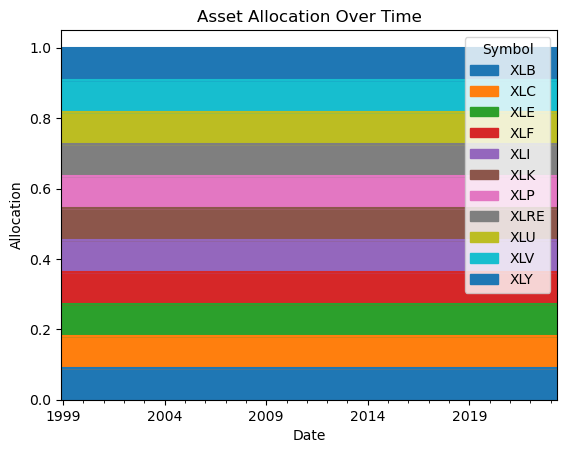

Symbol,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
1998-12-31,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
1999-01-31,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
1999-02-28,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
1999-03-31,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
1999-04-30,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
2023-02-28,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
2023-03-31,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909


In [28]:
weights_test1 = allocation_equalweighting(test1, df_returns.copy(), 'SPY')
weights_test1

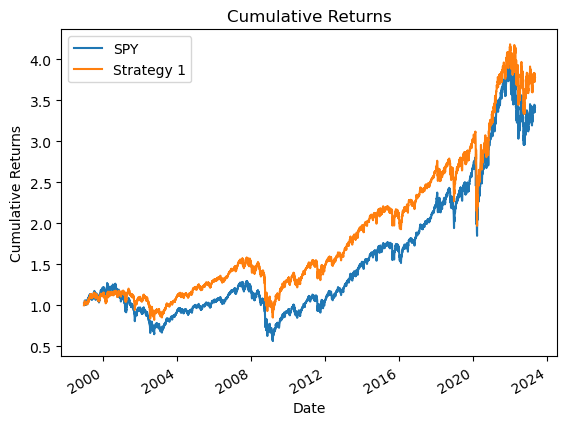

In [29]:
plot_performance([test1], df_returns.copy())

In [30]:
#(2nd test: the weight of each asset is proportional to average return rate/autocorrelation in previous year, so every day these measurement can be conduted to make new portfolio)
#Dual Momentum with escape
def dual_momentum(df, df_returns, momentum_periods, escape_periods):
    strategy = df.pct_change(periods=momentum_periods)
    strategy['Momentum Signal'] = strategy[df.columns].max(axis=1).clip(lower=0).fillna(0)

    df_escape = df.pct_change(periods=escape_periods)
    column_labels = strategy[df.columns].idxmax(axis=1)
    strategy['Momentum Signal'] = strategy['Momentum Signal'] * (df_escape.apply(lambda row: np.nan if pd.isna(column_labels[row.name]) else row[column_labels[row.name]], axis=1).clip(lower=0).fillna(0) > 0)
    strategy['Position'] = strategy['Momentum Signal'] != 0
    strategy['Position'] = strategy['Position'].astype(int).shift(1).fillna(0)
    strategy = strategy.ffill()

    column_labels = strategy[df.columns].idxmax(axis=1)
    # print(column_labels[column_labels.notna()])
    # Create a new column in strategy DataFrame named 'Market Returns'.
    # For each row in the df_returns DataFrame, do the following:
    # If the column label in 'column_labels' for the current row is NaN, then place NaN in 'Market Returns' for that row.
    # Otherwise, place the value from df_returns for that row and the column specified by 'column_labels' in 'Market Returns' for that row.
    strategy['portfolio no leave'] = df_returns.apply(lambda row: np.nan if pd.isna(column_labels.shift(2)[row.name]) else row[column_labels.shift(2)[row.name]], axis=1)
    strategy['portfolio'] = strategy['portfolio no leave'] * strategy['Position'].shift(1).fillna(0)
    return strategy

def allocation_dual_momentum(strategy, df_returns):
    # Create a DataFrame similar to df, but initially fill it with zeros
    df_weights = pd.DataFrame(0, index=df_returns.index, columns=df_returns.columns)
    column_labels = strategy[df_returns.columns].idxmax(axis=1)

    # For each date, set the column specified by column_labels to 1 and others to 0
    for date in df_weights.index:
        if pd.notna(column_labels.loc[date]):
            # Reset all columns to zero for the current date
            df_weights.loc[date, :] = 0
            # Set the column specified by column_labels to 1 for the current date
            df_weights.loc[date, column_labels.loc[date]] = 1
    # Assuming monthly rebalancing, forward fill the weights
    df_weights = df_weights.resample('M').first().ffill()

    # Plotting
    fig, ax = plt.subplots()
    df_weights.plot.area(ax=ax)
    ax.set_xlabel('Date')
    ax.set_ylabel('Allocation')
    ax.set_title('Asset Allocation Over Time')
    plt.show()
    return df_weights

test2 = [dual_momentum(df.copy(), df_returns.copy(), 100, 160)]
'''
test2.append(dual_momentum(df.copy(), df_returns.copy(), 90, 160))
test2.append(dual_momentum(df.copy(), df_returns.copy(), 100, 160))
test2.append(dual_momentum(df.copy(), df_returns.copy(), 110, 160))
test2.append(dual_momentum(df.copy(), df_returns.copy(), 120, 160))
'''
test2[0]

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,Momentum Signal,Position,portfolio no leave,portfolio
Date,,,,,,,,,,,,,,,,
1998-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN
1998-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN
1998-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN
1998-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN
1998-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,0.043191,-0.020155,0.183887,-0.056376,-0.069104,0.000603,0.147781,0.020330,-0.033141,-0.039538,-0.027295,0.050237,0.183887,1.0,-0.018534,-0.018534
2023-05-03,0.037796,-0.028821,0.185223,-0.072016,-0.076034,-0.001913,0.143904,0.007756,-0.041207,-0.037744,-0.036529,0.048234,0.185223,1.0,-0.003913,-0.003913
2023-05-04,0.022436,-0.042181,0.168560,-0.078239,-0.088677,-0.018620,0.120103,-0.000131,-0.039343,-0.036657,-0.052730,0.030206,0.168560,1.0,-0.016055,-0.016055


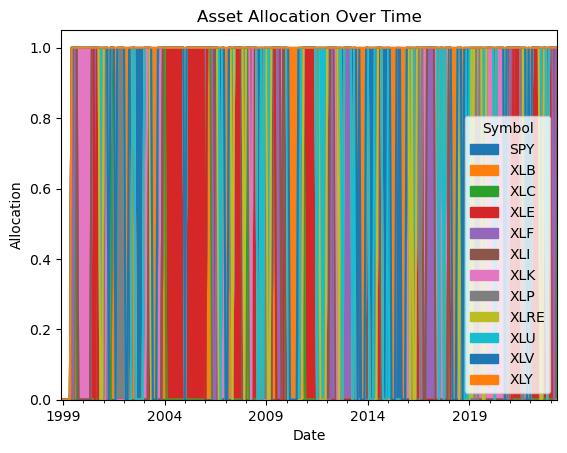

Symbol,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
1998-12-31,0,0,0,0,0,0,0,0,0,0,0,0
1999-01-31,0,0,0,0,0,0,0,0,0,0,0,0
1999-02-28,0,0,0,0,0,0,0,0,0,0,0,0
1999-03-31,0,0,0,0,0,0,0,0,0,0,0,0
1999-04-30,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0,0,0,1,0,0,0,0,0,0,0,0
2023-02-28,0,0,0,1,0,0,0,0,0,0,0,0
2023-03-31,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
weights_test2 = allocation_dual_momentum(test2[0], df_returns.copy())
weights_test2

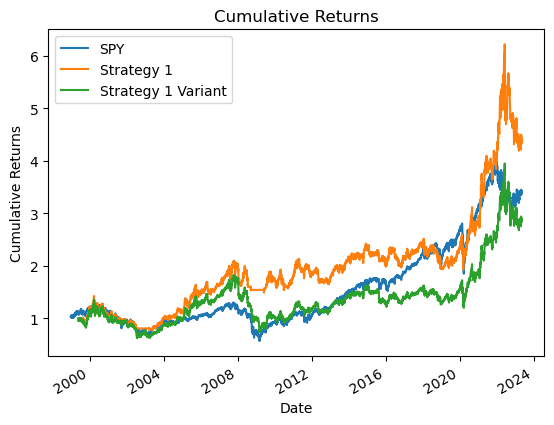

In [32]:
plot_performance(test2, df_returns.copy(), variant_list=['portfolio no leave'])

## Bonus
- 創造能穩定贏過SPY的投資組合
- 提供更詳盡的報表（如Sharpe Ratio、Max Drawdown等風險指標）


In [308]:
# Bonus

## TODO

End of Exercise 3